In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("../data/raw/Churn_Modelling.csv")
df.head(8)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1


In [7]:
df.shape

(10002, 14)

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [9]:
age_nan = df[df["Age"].isna()] #Removing Nan values
age_nan.head() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [10]:
df.loc[df["CustomerId"] == 15592389, "Age"] = np.mean(df["Age"]) ## set the mean value for Nan

In [11]:
rows_with_Nan = df.isna().sum() ## qty of Nan values
print(rows_with_Nan)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [12]:
geography_with_Nan = df[df["Geography"].isna()] ## Nan of Geography
geography_with_Nan.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.0,2,1.0,1.0,10062.8,0


In [13]:
countries = df["Geography"].value_counts() ##find the most usable country
print(countries)

France     5014
Germany    2510
Spain      2477
Name: Geography, dtype: int64


In [14]:
df.loc[df["CustomerId"] == 15592531, "Geography"] = "France"

In [15]:
df["IsActiveMember"] = df["IsActiveMember"].fillna(df["IsActiveMember"].mode()[0]) #change the Nan value on the mode
df["HasCrCard"] = df["HasCrCard"].fillna(df["HasCrCard"].mode()[0]) #change the Nan value on the mode

In [16]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.000000,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.000000,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.000000,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.000000,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.000000,2,125510.82,1,1.0,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.000000,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50.000000,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.000000,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.000000,4,142051.07,2,0.0,1.0,74940.50,0
9,10,15592389,H?,684,France,Male,38.922311,2,134603.88,1,1.0,1.0,71725.73,0


In [17]:
df_drop = df.drop(columns=["CustomerId", "RowNumber", "Surname"])
df_drop.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


In [18]:
df_encoded = pd.get_dummies(df_drop, columns=['Geography']) #One-Hot Encoding
df_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0
1,608,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1
2,502,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0
3,699,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0
4,850,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0,0,0,1


In [19]:
from sklearn.preprocessing import LabelEncoder #Label encoding

le = LabelEncoder()
df_encoded["Gender_encoder"] = le.fit_transform(df["Gender"])
df_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_encoder
0,619,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0,0
1,608,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1,0
2,502,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0,0
3,699,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0,0
4,850,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0,0,0,1,0


In [20]:
gender = df_encoded["Gender_encoder"].value_counts()
gender.head() 

1    5458
0    4544
Name: Gender_encoder, dtype: int64

In [21]:
df_encoded.drop(columns=["Gender"], inplace=True)
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_encoder
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0,0
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0,0
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0,0
4,850,43.0,2,125510.82,1,1.0,1.0,79084.10,0,0,0,1,0


In [22]:
X = df_encoded.drop(columns=["Exited"])
Y = df_encoded["Exited"]

In [23]:
X.to_csv("../data/processed/training.csv")
Y.to_csv("../data/processed/test.csv")

In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10002 non-null  int64  
 1   Age                10002 non-null  float64
 2   Tenure             10002 non-null  int64  
 3   Balance            10002 non-null  float64
 4   NumOfProducts      10002 non-null  int64  
 5   HasCrCard          10002 non-null  float64
 6   IsActiveMember     10002 non-null  float64
 7   EstimatedSalary    10002 non-null  float64
 8   Exited             10002 non-null  int64  
 9   Geography_France   10002 non-null  uint8  
 10  Geography_Germany  10002 non-null  uint8  
 11  Geography_Spain    10002 non-null  uint8  
 12  Gender_encoder     10002 non-null  int32  
dtypes: float64(5), int32(1), int64(4), uint8(3)
memory usage: 771.8 KB


In [25]:
cont_num_var = df_encoded.select_dtypes(include=['number']).columns.tolist()
print(cont_num_var)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_encoder']


In [26]:
df_encoded_num = df_encoded.drop(columns=["IsActiveMember",])

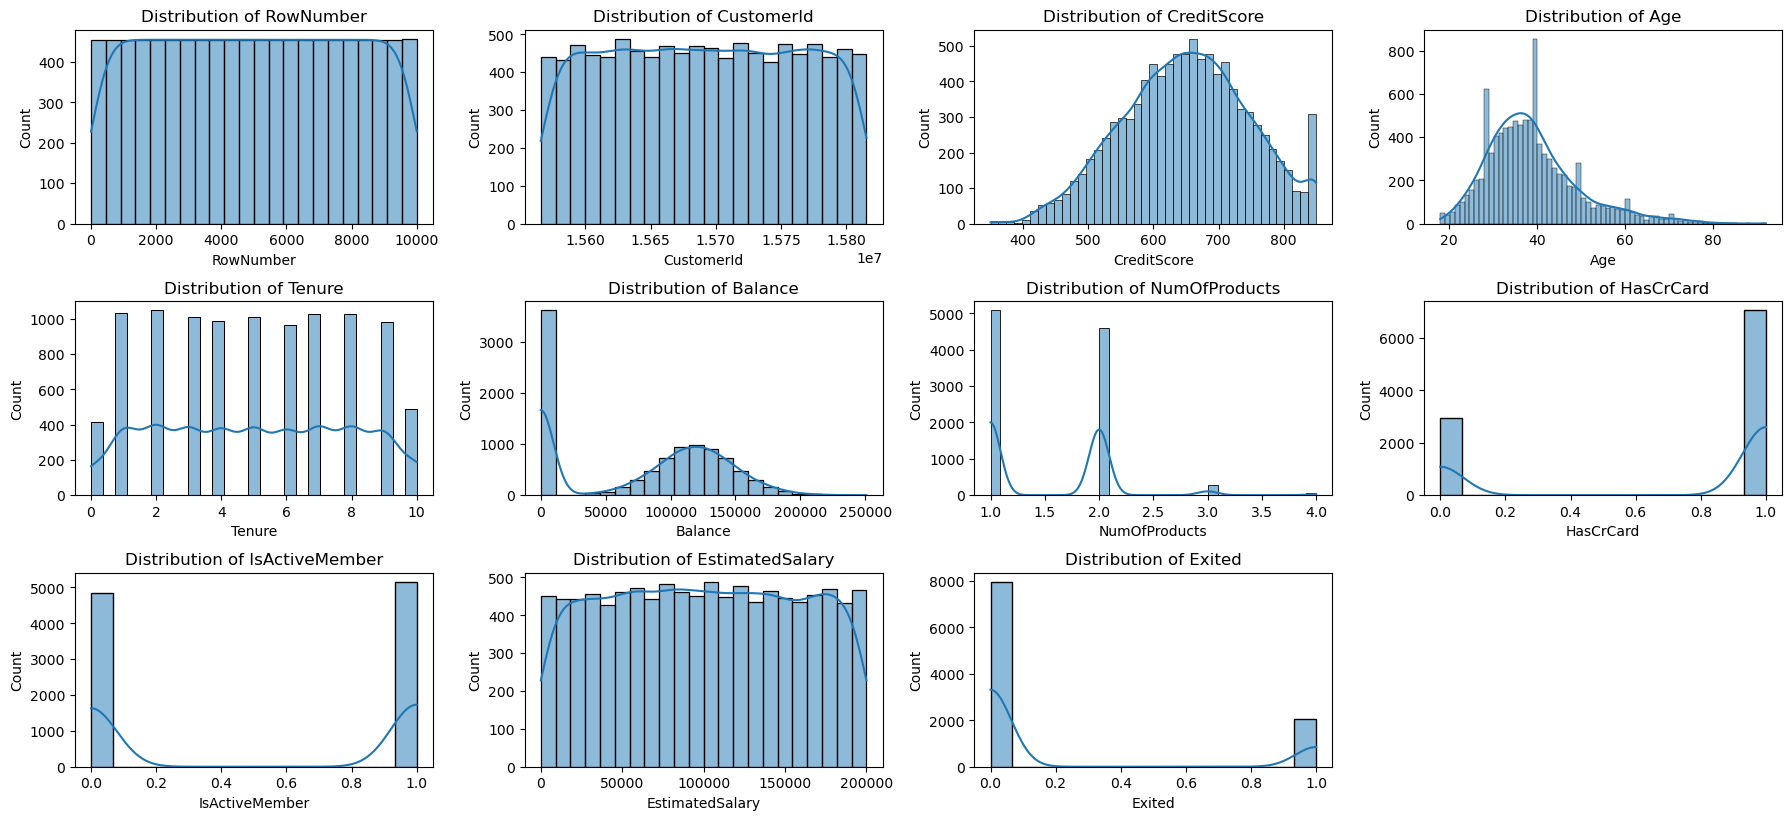

In [27]:
numeric_columns = df.select_dtypes(include=['number']).columns  # get the numerical columns
plt.figure(figsize=(18, 16))

for index, col in enumerate(numeric_columns):
    plt.subplot(6, 4, index + 1)
    sns.histplot(df[col].dropna(), kde=True)  # KDE 
    plt.title(f'Distribution of {col}')

plt.tight_layout(pad=1.0)
plt.show()

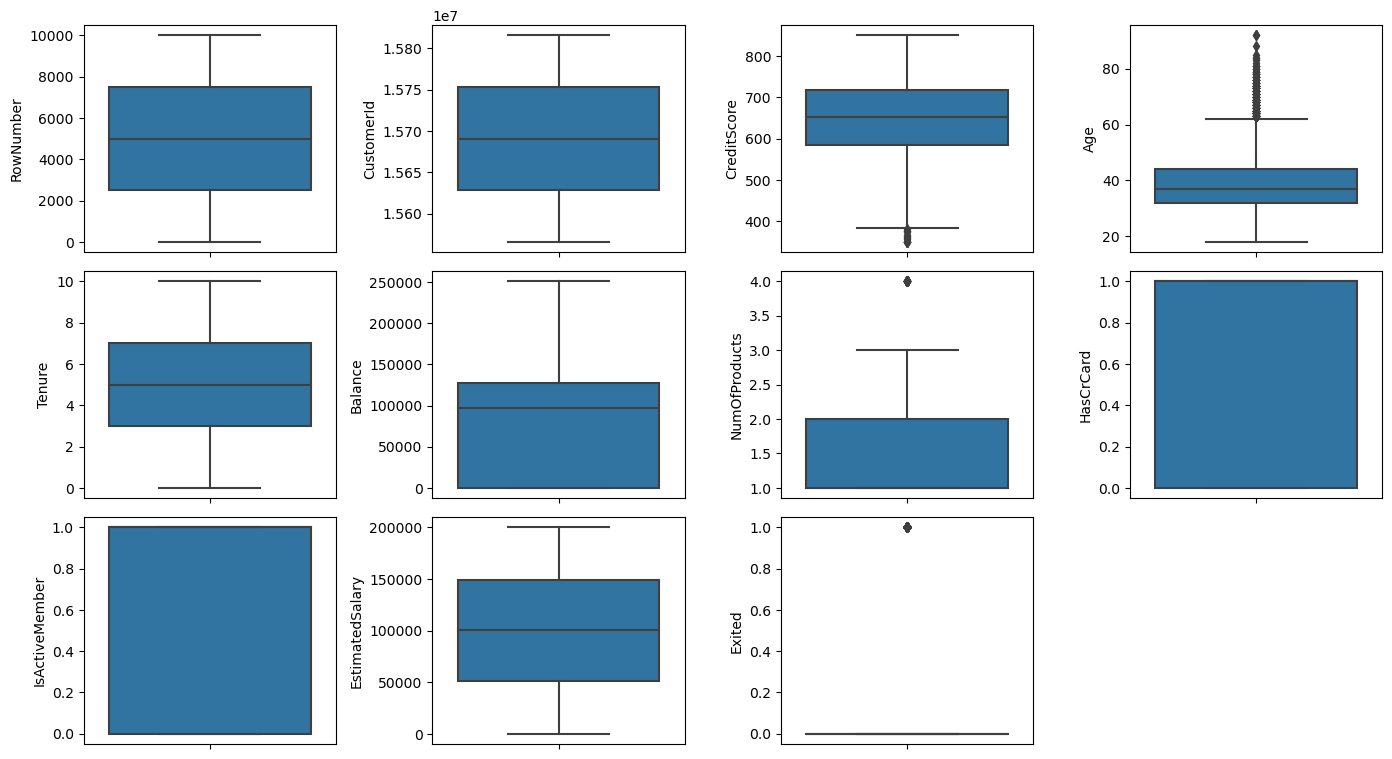

In [28]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(numeric_columns):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=df.dropna())
fig.tight_layout(pad=1.0)

C:\Users\esimb\AppData\Local\Temp\ipykernel_24044\3436581765.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

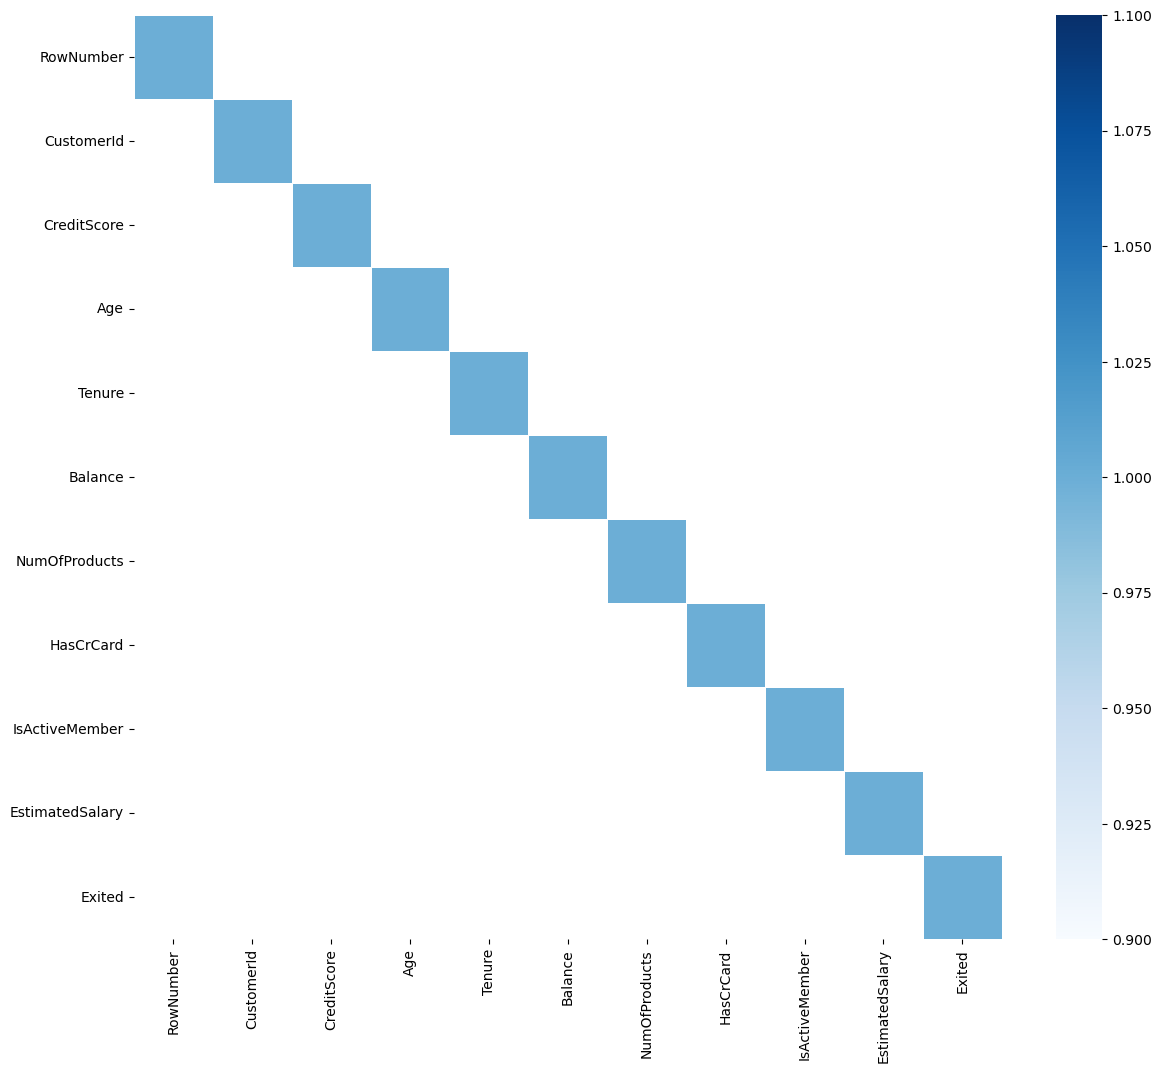

In [ ]:
plt.figure(figsize=(14,12))
correlation = df.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')
